# 紙を折る  
## 【問題1】  

In [3]:
"""
紙を43回折った時の厚さを計算するコード
"""

THICKNESS = 0.00008

#x^yはPython上でx**yと書きます。
#Pythonでも計算の優先順位があるので指数計算が先に行われます。
folded_thickness = THICKNESS*2**43

print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


今回は簡単な式ですが、複雑な計算式だと間違いが起きやすくなるので、
()やスペースを使ってわかりやすくすると良いと思います。  
以下にコードの例を示します。

In [11]:
#例：
folded_thickness = THICKNESS*(2**43)  
#簡単だと必要性を感じないかもしれないので
#応用例:
import numpy as np
a=np.pi/6
b=np.pi/6
c=10
d=10
answer1 = np.sin(a+b)/c/d*10**2
answer2 = np.sin(a+b)*(10**2)/(c*d)
print(answer1)
print(answer2)

0.8660254037844386
0.8660254037844386


## 【問題2】

In [12]:
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/10000000))

厚さ： 70.37万キロメートル


小数点の数はfの前の値で任意に決めることができます。  
月までの距離は38.4400kmつまり,38.44万キロメートルなので、43回紙を折ると月まで届きます。届きましたか？  
どうせなのでif文を書いて判別しましょう。

In [13]:
distance = 384400000  #(m)換算
if folded_thickness>=distance:
    print("月まで届きました")
else:
    print("月まで届いていません")

月まで届きました


## 【問題3】

In [4]:
folded_thickness=THICKNESS

for i in range(43):
    folded_thickness *= 2
print(folded_thickness)

703687441.77664


問題１で出力された値と同じになっていることが確認できると思います。
同じ結果になっていますが、何が異なっているか比較してみましょう。

## 【問題4】

In [98]:
import time
start = time.time()

#実行したいプログラムの#を消して、実行したくないプログラムに#をつけてください
#このfor文は実行時間が短すぎるため、わかりやすくするために使っています
for k in range(1000):
    folded_thickness = THICKNESS
    
    #指数計算
    #folded_thickness = THICKNESS*2**43
    
    #for文
    for i in range(43):
        folded_thickness *= 2

elapsed_time = time.time() - start
print("time : {:.10f}[ms]".format(elapsed_time))

time : 0.0109324455[ms]


どちらも実行してみるとわかると思いますが、計算時間においてはfor文を使わないほうが早くなります。指数関数では１回の計算で済むのに対し、for文を使うと43回計算することになります。結果として計算時間に差が生じています。  
 

# 過程の可視化  

## 【問題5】

In [88]:
folded_thickness = THICKNESS
folded_list = []  #ここに過程を保存（ｙ軸）任意の名前でよい

#43回目を保存するため44回繰り返しています
for i in range(44):
    folded_list.append(folded_thickness)
    folded_thickness *= 2

#データの数を確認
print(len(folded_list))

44


こういった過程を保存していく場合では、指数計算を用いても、どちらでもよいと思います。  
また、なぜ44回繰り返すのか、という疑問があると思う。これはfor文の中を見るとわかります。  
1. folded_listにfolded_thicknessを追加  
2. i+1回折った時の厚さを計算  

という順序になっているので、43回折った時の厚さを保存するためには44回繰り返さなければいけないのです。  
では配列に保存したデータを使って、過程をグラフとして出力してみましょう。  
## 【問題6】

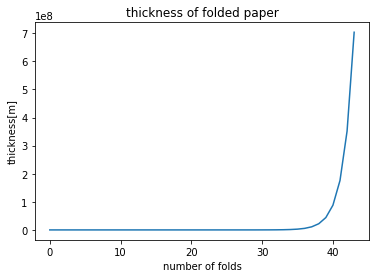

In [112]:
#グラフ描画モジュールをimportします
import matplotlib.pyplot as plt
#jupyter notebook上でグラフ描画するため
%matplotlib inline
#グラフのタイトル
plt.title("thickness of folded paper")
#x軸のラベル（折った回数）
plt.xlabel("number of folds")
#y軸のラベル（折った時の厚さ）
plt.ylabel("thickness[m]")
plt.plot(folded_list) # 「folded_list」には自分で決めていた配列名を入れる

指数関数によって急に増えていることが分かると思います。  
今回の場合は、x軸は０～４３までを、１ずつ増加するのでx軸を任意に設定しませんでしたが、x軸の値を自由に設定することができます。  
以下に簡単な例を示します。

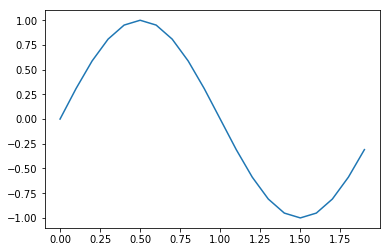

In [95]:
import numpy as np
#0から0.1の間隔で2まで
x = np.arange(0,2,0.1)
y = np.sin(np.pi*x)
plt.plot(x,y)

## 【問題7】  
ここでは作成したグラフをカスタマイズする練習をします。

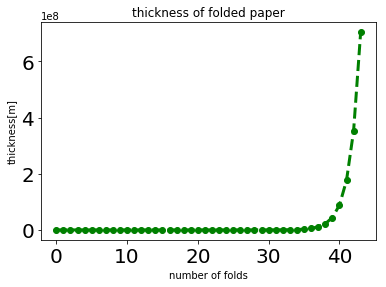

In [111]:
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(folded_list,linestyle="--",marker="o",color="g",linewidth=3)

以上のように様々なグラフのカスタマイズができる。ここで重要なのが、あくまでこれはカスタマイズの練習であり、本来グラフのカスタマイズはあくまで「わかりやすくする」ためです。必要以上にカスタマイズを施す必要はありません。  他にも様々なカスタマイズがありますので、matplotlibの公式ドキュメントを随時参照するといいと思います。  
sin,cosを同時に描画して、凡例をグラフ内に表示するなどすると練習になるかもしれません。

## 改善案  
追加するとよさそうな記述や問題案は関係する問題に付随する形で記述しました。わかりにくい記述や、不適切な記述というほどではありませんが、計算速度を計算する部分で、単純な計算なので、計算回数を任意に増やしてもよいという旨の記述があるといいかもしれないと思いました。  
グラフのカスタマイズの課題については、課題７の最後にも既述したように、「必ずカスタマイズするべき」ようなものではないと思うので、グラフによってはある程度カスタマイズしたほうがいい。という例だけ示して（例えばsin,cosなど）、カスタマイズができる事だけ覚えていてもらう形でいいと思ます。